# Linear SVC Training

## Python Imports

In [109]:
import pickle

import numpy as np
from notebooks.utilities import data, ml_stats, sampling
from notebooks.utilities import train_test_split as tts
from notebooks.utilities import vectorize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.svm import LinearSVC

In [152]:
df

,class,text
64848,0,freak nothing wikepedia
105872,0,Esperanza Election Thank much vote support fir...
168009,0,Edits Howdy edited segment represented Article...
159138,0,Gogo Dodo know protecting shameful selfpromote...
51723,0,SPI Case You mention something SPI case taken ...
...,...,...
182537,0,I asked earlier comment content contributors W...
19841,1,RT phishlicia tropicaldrew fag I miss like crazy
106374,0,School African Oriental LanguagesI run put ref...
163617,0,I like kitty I like kitty You told work syntax...


## Load Data

In [110]:
df = data.neutral()

In [111]:
df_sampled = sampling.undersample(df)

## Training Function

In [112]:
def linsvc(
    X_train,
    y_train,
    X_test,
    name,
    penalty="l2",
    loss="squared_hinge",
    C=10000000,
    max_iter=1000,
):
    svm = LinearSVC(penalty=penalty, loss=loss, C=C, max_iter=max_iter, dual=False)
    clf = CalibratedClassifierCV(svm)
    clf.fit(X_train, y_train.argmax(axis=1))
    pickle.dump(
        clf, open(f"../../models/neutral_models/vectorizers/{name}.pkl", "wb",),
    )
    return clf.predict(X_test), clf

## TF-IDF Vectorizer

### Vectorization

In [113]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  16.73
Length of vocabulary: 3004


### Train-Test Splits

In [114]:
y = tts.encode_outputs(df_sampled["class"])

In [115]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [116]:
y_pred, model = linsvc(X_train, y_train, X_test, "linearsvc_tfidf")

### Metrics

In [117]:
model.score(X_train, y_train.argmax(axis=1))

0.8993166729039322

In [118]:
ml_stats.validation(y_test, y_pred)

0.894106558740367
0.6072517602705549


In [119]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9848501603450183
Class 1 Accuracy: 0.8028685790527018


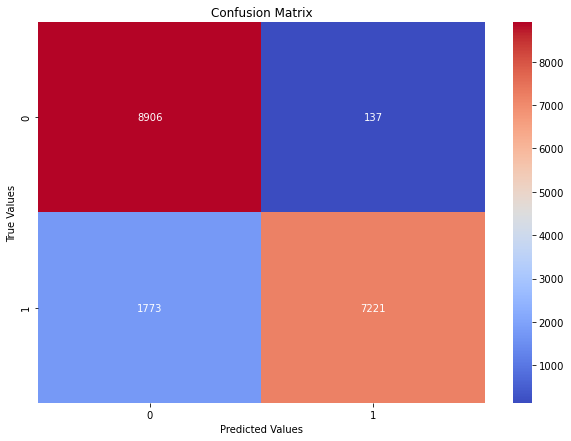

In [120]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [121]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.91
Macro Recall: 0.89
Macro F1-score: 0.89

Weighted Precision: 0.91
Weighted Recall: 0.89
Weighted F1-score: 0.89

Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.98      0.90      9043
     Class 1       0.98      0.80      0.88      8994

    accuracy                           0.89     18037
   macro avg       0.91      0.89      0.89     18037
weighted avg       0.91      0.89      0.89     18037



## Low TF-IDF Vectorizer

### Vectorization

In [122]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "l1_linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.49
Length of vocabulary: 3004


### Train-Test Splits

In [123]:
y = tts.encode_outputs(df_sampled["class"])

In [124]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [125]:
y_pred, model = linsvc(X_train, y_train, X_test, "l1_linearsvc_tfidf", C=1)

### Metrics

In [126]:
model.score(X_train, y_train.argmax(axis=1))

0.9228380944460615

In [127]:
ml_stats.validation(y_test, y_pred)

0.915118922215446
0.586239396795476


In [128]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9598584540528585
Class 1 Accuracy: 0.8701356459862131


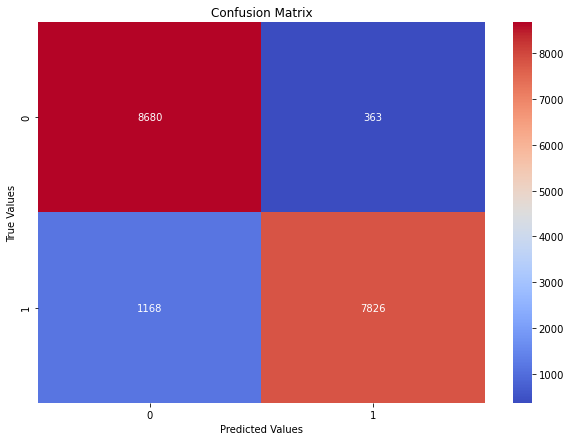

In [129]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [130]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.88      0.96      0.92      9043
     Class 1       0.96      0.87      0.91      8994

    accuracy                           0.92     18037
   macro avg       0.92      0.91      0.91     18037
weighted avg       0.92      0.92      0.91     18037



## Count Vectorizer

### Vectorization

In [131]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.77
Length of vocabulary: 3004


### Train-Test Split

In [132]:
y = tts.encode_outputs(df_sampled["class"])

In [133]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [134]:
y_pred, model = linsvc(X_train, y_train, X_test, "linearsvc_tfidf")

### Metrics

In [135]:
model.score(X_train, y_train.argmax(axis=1))

0.6783372836015358

In [136]:
ml_stats.validation(y_test, y_pred)

0.6771636081388257
0.8241947108720963


In [137]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9984518412031406
Class 1 Accuracy: 0.3541249722036913


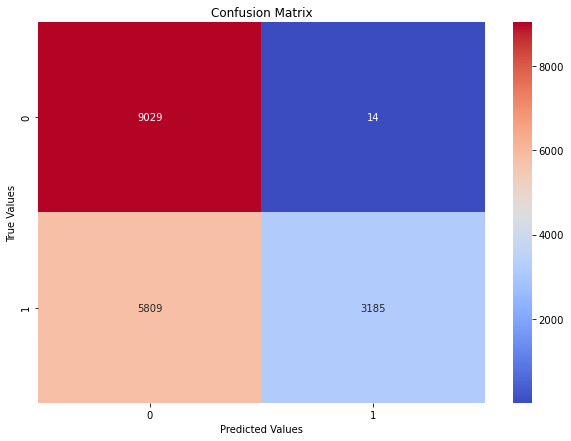

In [138]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [139]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.80
Macro Recall: 0.68
Macro F1-score: 0.64

Weighted Precision: 0.80
Weighted Recall: 0.68
Weighted F1-score: 0.64

Classification Report

              precision    recall  f1-score   support

     Class 0       0.61      1.00      0.76      9043
     Class 1       1.00      0.35      0.52      8994

    accuracy                           0.68     18037
   macro avg       0.80      0.68      0.64     18037
weighted avg       0.80      0.68      0.64     18037



## Low Count Vectorizer

### Vectorization

In [140]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.30
Length of vocabulary: 3004


### Train-Test Split

In [141]:
y = tts.encode_outputs(df_sampled["class"])

In [142]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [143]:
y_pred, model = linsvc(X_train, y_train, X_test, "l1_linearsvc_tfidf", C=1)

### Metrics

In [144]:
model.score(X_train, y_train.argmax(axis=1))

0.663437149153811

In [145]:
ml_stats.validation(y_test, y_pred)

0.6644120419138437
0.8369462770970783


In [146]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.998673006745549
Class 1 Accuracy: 0.3283299977762953


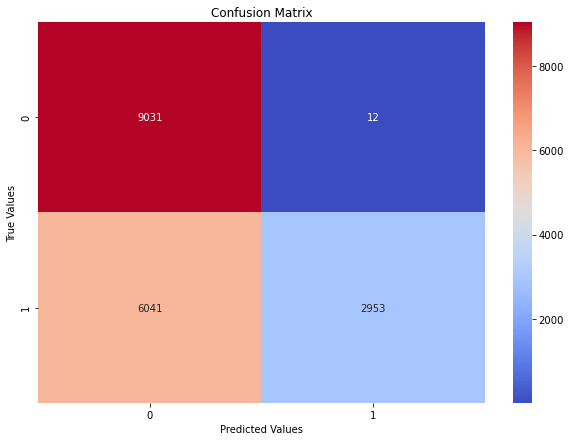

In [147]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [148]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

Macro Precision: 0.80
Macro Recall: 0.66
Macro F1-score: 0.62

Weighted Precision: 0.80
Weighted Recall: 0.66
Weighted F1-score: 0.62

Classification Report

              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75      9043
     Class 1       1.00      0.33      0.49      8994

    accuracy                           0.66     18037
   macro avg       0.80      0.66      0.62     18037
weighted avg       0.80      0.66      0.62     18037

